### Importing all the libraries

In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from keras import callbacks
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [742]:
df=pd.read_csv("./Telco-Customer-Churn.csv")

In [743]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3134,1142-WACZW,Male,0,No,No,2,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),29.85,75.60,Yes
2441,9492-TOKRI,Female,0,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.00,1527.35,Yes
2584,7576-OYWBN,Male,1,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.05,231.80,Yes
7025,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
2922,5542-TBBWB,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,No
3073,5277-ZLOOR,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.55,187.45,Yes
1054,1624-WOIWJ,Female,0,No,No,10,Yes,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.70,832.05,Yes
6683,7895-VONWT,Female,0,No,No,25,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,48.25,1293.80,No
1328,4656-CAURT,Male,0,No,No,69,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.95,1713.10,No
3039,5692-FPTAH,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.40,45.40,Yes


In [744]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [745]:
df.shape

(7032, 21)

### Removing the customerID column because it is not putting any value to the dataset which will help in customer churn prediction

In [746]:
df.drop(columns=['customerID'], axis=0, inplace=True)

In [747]:
df.shape

(7032, 20)

In [748]:
df[df['Churn']=='Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7015,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7021,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7023,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [749]:
df[df['Churn']=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### Exploratory Data Analysis

In [750]:
churn_counts = df['Churn'].value_counts()
churn_counts

No     5163
Yes    1869
Name: Churn, dtype: int64

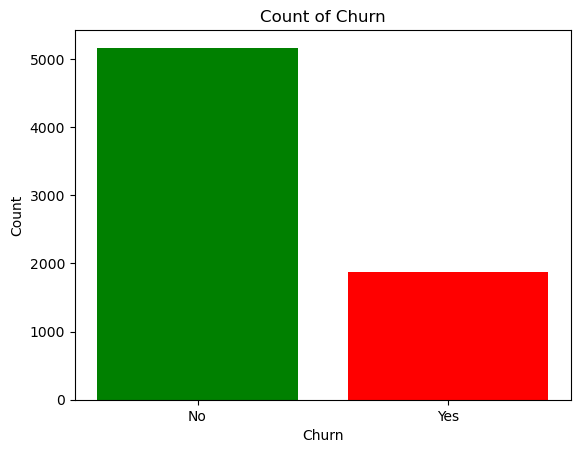

In [751]:
plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count of Churn')
plt.xticks(churn_counts.index, ['No', 'Yes'])
plt.show()

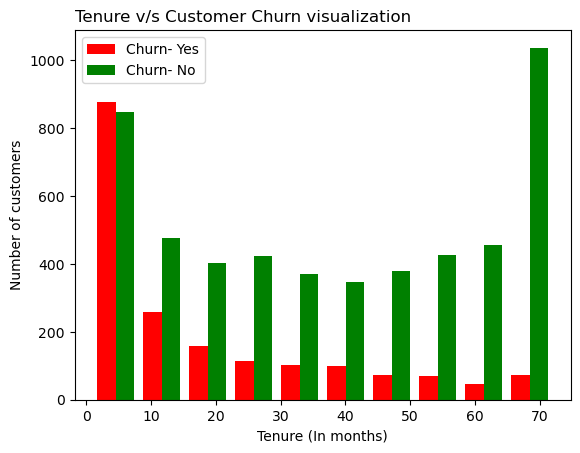

In [752]:
tenure_churn_yes=df[df['Churn']=='Yes'].tenure
tenure_churn_no=df[df['Churn']=='No'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['Churn- Yes', 'Churn- No'])
plt.title("Tenure v/s Customer Churn visualization", loc='left')
plt.xlabel("Tenure (In months)")
plt.ylabel("Number of customers")
plt.legend()
plt.show()

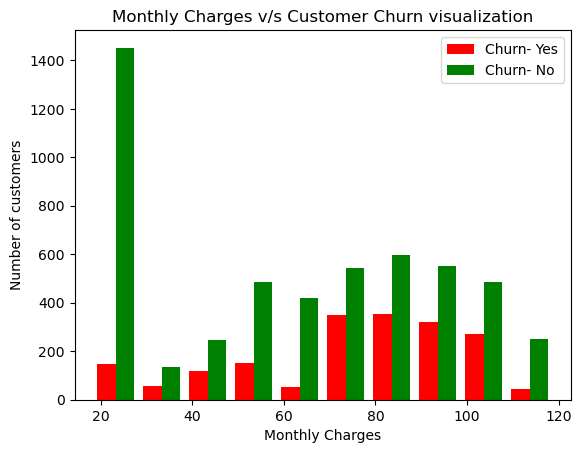

In [753]:
monthly_charges_churn_yes=df[df['Churn']=='Yes'].MonthlyCharges
monthly_charges_churn_no=df[df['Churn']=='No'].MonthlyCharges

plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['red', 'green'], label=['Churn- Yes', 'Churn- No'])
plt.title("Monthly Charges v/s Customer Churn visualization")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.legend()
plt.show()

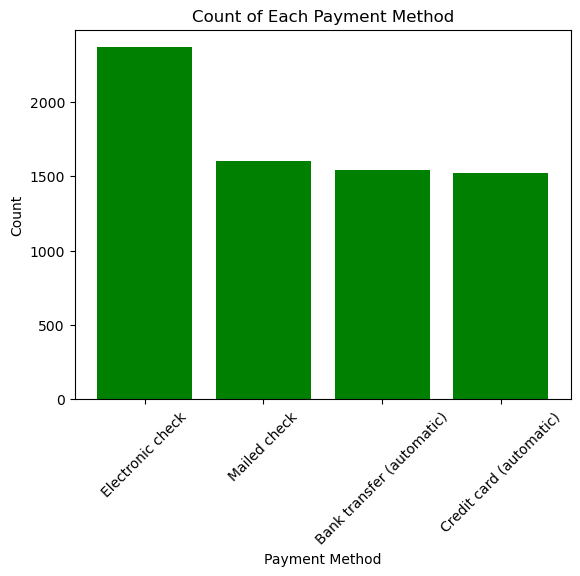

In [758]:
payment_counts = df['PaymentMethod'].value_counts()
plt.bar(payment_counts.index, payment_counts.values, color='green')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Count of Each Payment Method')
plt.xticks(rotation=45)
plt.show()

### Checking all the unique values in all the columns

In [692]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [693]:
df['MultipleLines'].replace("No phone service", "No", inplace=True)

In [694]:
df['DeviceProtection'].replace("No internet service", "No", inplace=True)
df['OnlineSecurity'].replace("No internet service", "No", inplace=True)
df['OnlineBackup'].replace("No internet service", "No", inplace=True)
df['TechSupport'].replace("No internet service", "No", inplace=True)
df['StreamingTV'].replace("No internet service", "No", inplace=True)
df['StreamingMovies'].replace("No internet service", "No", inplace=True)

In [695]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


### Replace all the columns with yes and no with '1' and '0'

In [696]:
yes_and_no_columns=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_and_no_columns:
    df[col].replace({"Yes": 1, "No": 0}, inplace=True)

In [697]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [698]:
df['gender'].replace({"Female": 1, "Male": 0}, inplace=True)

In [699]:
df['gender'].unique()

array([1, 0])

### One-hot encoding for all the other columns

In [700]:
df=pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [701]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [702]:
df.shape

(7032, 27)

In [703]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [704]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### Using MinMax Scaler on columns in the dataframe for scaling the values

In [705]:
cols_to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [706]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4421,1,0,1,1,0.971831,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
6729,0,0,0,0,0.042254,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5661,1,0,1,1,0.225352,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3133,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5398,1,0,1,1,0.873239,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1


In [707]:
df['MonthlyCharges'].sample(5)

5730    0.842289
3886    0.328856
5826    0.010448
1002    0.772139
2641    0.632338
Name: MonthlyCharges, dtype: float64

In [708]:
df['TotalCharges'].sample(5)

6252    0.147536
6848    0.919351
343     0.151090
5937    0.362538
3071    0.042730
Name: TotalCharges, dtype: float64

In [709]:
X=df.drop(columns=['Churn'], axis=0)

In [710]:
X.shape

(7032, 26)

In [711]:
y=df['Churn']

In [712]:
y.shape

(7032,)

### Train and test split

In [713]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=5)

In [714]:
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

X train shape (5625, 26)
X test shape (1407, 26)
y train shape (5625,)
y test shape (1407,)


### Logistic Regression

In [715]:
log_reg=LogisticRegression()

In [716]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [717]:
log_reg_pred=log_reg.predict(X_test)

In [718]:
confusion_matrix=metrics.confusion_matrix(y_test, log_reg_pred)

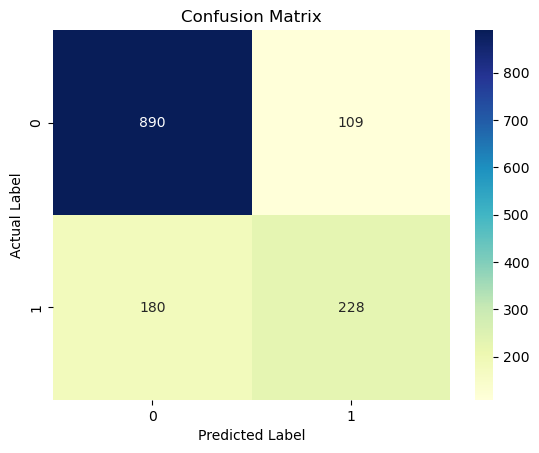

In [719]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [720]:
target_names=['No Churn- Positive', 'Churn- Negative']
print(classification_report(y_test, log_reg_pred, target_names=target_names))

                    precision    recall  f1-score   support

No Churn- Positive       0.83      0.89      0.86       999
   Churn- Negative       0.68      0.56      0.61       408

          accuracy                           0.79      1407
         macro avg       0.75      0.72      0.74      1407
      weighted avg       0.79      0.79      0.79      1407



### Decision Tree Classifier

In [721]:
dt_clf=DecisionTreeClassifier()

In [722]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [723]:
dt_clf_pred=dt_clf.predict(X_test)

In [724]:
confusion_matrix=metrics.confusion_matrix(y_test, dt_clf_pred)

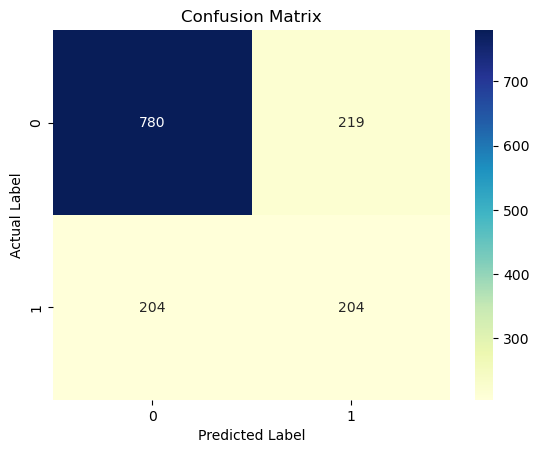

In [725]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [726]:
target_names=['No Churn- Positive', 'Churn- Negative']
print(classification_report(y_test, dt_clf_pred, target_names=target_names))

                    precision    recall  f1-score   support

No Churn- Positive       0.79      0.78      0.79       999
   Churn- Negative       0.48      0.50      0.49       408

          accuracy                           0.70      1407
         macro avg       0.64      0.64      0.64      1407
      weighted avg       0.70      0.70      0.70      1407



In [727]:
print("Accuracy:", metrics.accuracy_score(y_test, dt_clf_pred))

Accuracy: 0.6993603411513859


### Trying to optimize the Decison Tree by Hyperparameter tuning using GridSearchCV

In [728]:
dt_params = [{'criterion':['gini', 'entropy'], 'max_depth': [2, 3, 5, 7, 10]}]
grid_search_dt_clf=GridSearchCV(dt_clf, dt_params, cv=10, scoring='accuracy')
grid_search_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 5, 7, 10]}],
             scoring='accuracy')

### Best parameters obtained with accuracy in training set

In [729]:
print(grid_search_dt_clf.best_params_)
print(grid_search_dt_clf.best_score_)

{'criterion': 'entropy', 'max_depth': 3}
0.791997623306764


### Accuracy in test set using the best hyperparamters

In [730]:
dt_clf_opt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt_clf_opt = dt_clf_opt.fit(X_train,y_train)

dt_clf_opt_pred = dt_clf_opt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, dt_clf_opt_pred))

Accuracy: 0.7690120824449183


### Clearly, performance of Logistic Regression outperformed the Decision Tree algorithm even after doing the Hyperparameter tuning. Now let's use ANN and find out the performance

In [731]:
model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

early_stopping=callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=5, restore_best_weights=True)

history=model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping])

Epoch 1/100
176/176 [==============================] - 0s 340us/step - loss: 0.5797 - accuracy: 0.6770
Epoch 2/100
176/176 [==============================] - 0s 305us/step - loss: 0.4390 - accuracy: 0.7911
Epoch 3/100
176/176 [==============================] - 0s 284us/step - loss: 0.4233 - accuracy: 0.7989
Epoch 4/100
176/176 [==============================] - 0s 325us/step - loss: 0.4178 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 292us/step - loss: 0.4153 - accuracy: 0.8023
Epoch 6/100
176/176 [==============================] - 0s 352us/step - loss: 0.4139 - accuracy: 0.8036
Epoch 7/100
176/176 [==============================] - 0s 273us/step - loss: 0.4131 - accuracy: 0.8039
Epoch 8/100
176/176 [==============================] - 0s 333us/step - loss: 0.4115 - accuracy: 0.8057
Epoch 9/100
176/176 [==============================] - 0s 331us/step - loss: 0.4116 - accuracy: 0.8059
Epoch 10/100
176/176 [==============================] - 0s 277us/step - l

In [732]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 400us/step - loss: 0.4403 - accuracy: 0.7825


[0.44026464223861694, 0.7825160026550293]

In [733]:
model_predict=model.predict(X_test)
model_predict[:5]

44/44 [==============================] - 0s 255us/step


array([[0.24669434],
       [0.37710086],
       [0.00995538],
       [0.71730137],
       [0.5023626 ]], dtype=float32)

In [734]:
y_test[:5]

2655    0
743     0
5570    1
64      1
3282    1
Name: Churn, dtype: int64

In [735]:
y_pred=[]
for i in model_predict:
    if(i<0.5):
        y_pred.append(0)
    else:
        y_pred.append(1)


In [736]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [737]:
confusion_matrix=metrics.confusion_matrix(y_test, y_pred)

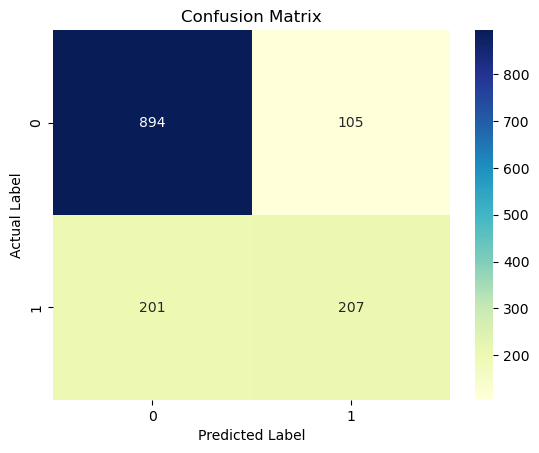

In [738]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [739]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.51      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407

